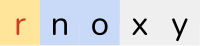
<div style="clear:both"></div>
Rafał Nowak<br/>
<a href="https://github.com/rnoxy">github.com/rnoxy</a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import plotly.express as px

SEED = 1234
np.random.seed(SEED)

# Zbiór danych

* Zbiór danych: https://archive.ics.uci.edu/ml/datasets/heart+disease
* Plik z danymi: https://www.kaggle.com/arviinndn/heart-disease-prediction-uci-dataset/data


In [2]:
df = pd.read_csv('datasets/heart_disease_dataset_UCI.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = df.drop(columns=["target"]).values
y = df["target"].values

N, D = X.shape
y = np.reshape(y, (N, 1))

print("X.shape =", X.shape)
print("y.shape =", y.shape)

X.shape = (303, 13)
y.shape = (303, 1)


In [5]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [7]:
print("X_train.shape =", X_train.shape)
print("y_train.shape =", y_train.shape)

X_train.shape = (227, 13)
y_train.shape = (227, 1)


In [8]:
print("X_test.shape =", X_test.shape)
print("y_test.shape =", y_test.shape)

X_test.shape = (76, 13)
y_test.shape = (76, 1)


In [9]:
N, D = X_train.shape
N, D

(227, 13)

# Model - regresja logistyczna

In [10]:
w = np.random.randn(D,1)
b = 0.0

In [11]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def model(X, w, b):
    logits = np.matmul(X, w) + b
    return sigmoid(logits)

In [12]:
model(X_train, w, b)

array([[3.10104409e-138],
       [1.10088241e-108],
       [4.19114251e-128],
       [6.78652969e-139],
       [1.65042745e-126],
       [2.05101880e-136],
       [1.05318548e-144],
       [1.16376706e-113],
       [7.02504314e-113],
       [2.98876259e-103],
       [2.43905059e-139],
       [4.18758761e-140],
       [3.10977550e-129],
       [9.91698076e-109],
       [1.67424222e-150],
       [1.02402841e-092],
       [1.73880517e-134],
       [2.69158273e-105],
       [1.14389926e-111],
       [2.12460653e-104],
       [3.82344292e-150],
       [1.81454025e-107],
       [6.06413650e-128],
       [2.73648695e-109],
       [1.61531243e-096],
       [3.70308590e-136],
       [4.55470927e-111],
       [1.70876965e-115],
       [4.16714659e-116],
       [4.25528275e-116],
       [4.61645923e-109],
       [2.09353340e-116],
       [1.20495744e-091],
       [2.80452257e-120],
       [4.82315515e-119],
       [1.78359736e-111],
       [8.70147959e-125],
       [1.12083553e-120],
       [4.71

# Normalizacja danych (!!!)

In [13]:
X_mean = np.mean(X_train, axis=0)
X_mean

array([5.47224670e+01, 6.82819383e-01, 9.51541850e-01, 1.31955947e+02,
       2.47762115e+02, 1.49779736e-01, 5.19823789e-01, 1.48594714e+02,
       3.39207048e-01, 1.11762115e+00, 1.37004405e+00, 6.47577093e-01,
       2.27753304e+00])

In [14]:
X_std = np.std(X_train, axis=0)
X_std

array([ 8.78663267,  0.46537842,  1.0419969 , 17.1386622 , 55.03603762,
        0.35685539,  0.52539389, 23.4121014 ,  0.4734402 ,  1.19645128,
        0.61878202,  0.95217388,  0.63494222])

In [15]:
def normalize(x, mean, sigma):
    y = (x-mean)/sigma
    return y

X_train_normalized = normalize(X_train, X_mean, X_std)

In [16]:
np.mean(X_train_normalized, axis=0)

array([ 2.61660493e-16, -9.78170066e-19, -1.76070612e-17, -8.41226257e-17,
       -1.71424304e-16, -2.03948459e-16, -1.49660020e-16,  5.04980296e-16,
       -1.21293088e-16,  3.24752462e-16, -3.08123571e-17, -1.24961226e-16,
       -2.48455197e-16])

In [17]:
np.std(X_train_normalized, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
model(X_train_normalized, w, b)

array([[2.64636790e-01],
       [5.06091246e-02],
       [9.98475209e-01],
       [3.53574324e-04],
       [1.51988900e-02],
       [4.52531890e-01],
       [7.16998016e-04],
       [9.98688866e-01],
       [9.98341539e-01],
       [8.00083717e-01],
       [2.31938225e-02],
       [1.39031694e-01],
       [9.25997264e-01],
       [5.87540475e-01],
       [9.23571610e-01],
       [9.99813033e-01],
       [8.73513608e-01],
       [9.75337603e-01],
       [9.05357607e-01],
       [9.19491656e-01],
       [6.36239565e-02],
       [3.20889274e-01],
       [2.61314874e-01],
       [2.17003974e-01],
       [1.20006858e-02],
       [8.20374898e-01],
       [6.67024898e-02],
       [3.96426720e-01],
       [9.99900067e-01],
       [8.92683423e-01],
       [5.89535389e-03],
       [9.25792451e-01],
       [9.80752869e-01],
       [9.92457706e-01],
       [3.02073676e-01],
       [9.64184443e-01],
       [8.97318510e-01],
       [9.15112871e-01],
       [5.30063902e-01],
       [6.52322869e-03],


# Trenowanie modelu

In [19]:
def cross_entropy(y_pred, y):
    return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

def compute_cost(X, y, w, b):
    y_pred = model(X, w, b)
    return cross_entropy(y_pred, y)

In [20]:
y_pred = model(X_train_normalized, w, b)
cross_entropy(y_pred, y_train)

0.9359660736461913

In [21]:
def compute_gradient(X, y, w, b):
    N = len(X)
    y_pred = model(X, w, b)
    error = y_pred - y
    dw = 1/N * np.matmul(X.T, error)
    db = 1/N * np.sum(error)
    return dw, db

In [22]:
dw, db = compute_gradient(X_train_normalized, y_train, w, b)
dw.shape, db.shape

((13, 1), ())

In [23]:
dw

array([[ 0.14053489],
       [ 0.04324603],
       [-0.06508423],
       [ 0.04016067],
       [-0.00817806],
       [ 0.07525872],
       [ 0.06854708],
       [-0.1623787 ],
       [ 0.13002419],
       [-0.02925508],
       [ 0.02213148],
       [ 0.25165263],
       [ 0.14471317]])

In [24]:
db

-0.027680573798261006

In [25]:
import torch

X_torch = torch.tensor(X_train_normalized)

In [26]:
X_torch.shape

torch.Size([227, 13])

In [27]:
y_torch = torch.tensor(y_train, dtype=torch.double)
y_torch.shape

torch.Size([227, 1])

In [28]:
w_torch = torch.tensor(w)
w_torch.shape

torch.Size([13, 1])

In [29]:
b_torch = torch.tensor(b)

In [30]:
w

array([[ 0.47143516],
       [-1.19097569],
       [ 1.43270697],
       [-0.3126519 ],
       [-0.72058873],
       [ 0.88716294],
       [ 0.85958841],
       [-0.6365235 ],
       [ 0.01569637],
       [-2.24268495],
       [ 1.15003572],
       [ 0.99194602],
       [ 0.95332413]])

In [31]:
w_torch

tensor([[ 0.4714],
        [-1.1910],
        [ 1.4327],
        [-0.3127],
        [-0.7206],
        [ 0.8872],
        [ 0.8596],
        [-0.6365],
        [ 0.0157],
        [-2.2427],
        [ 1.1500],
        [ 0.9919],
        [ 0.9533]], dtype=torch.float64)

In [32]:
torch.sigmoid(torch.tensor(1.0))

tensor(0.7311)

In [33]:
def model_torch(X, w, b):
    logits = torch.matmul(X, w) + b
    return torch.sigmoid(logits)

def cross_entropy_torch(y_pred, y):
    return -torch.mean(y*torch.log(y_pred) + (1-y)*torch.log(1-y_pred))

def compute_cost_torch(X, y, w, b):
    y_pred = model_torch(X, w, b)
    return cross_entropy_torch(y_pred, y)

In [34]:
compute_cost_torch(X_torch, y_torch, w_torch, b_torch)

tensor(0.9360, dtype=torch.float64)

In [35]:
compute_cost(X_train_normalized, y_train, w, b)

0.9359660736461913

In [36]:
w_torch = torch.tensor(w, requires_grad=True)
b_torch = torch.tensor(b, requires_grad=True)

In [37]:
loss = compute_cost_torch(X_torch, y_torch, w_torch, b_torch)
loss

tensor(0.9360, dtype=torch.float64, grad_fn=<NegBackward0>)

In [38]:
loss.backward()

In [39]:
w_torch.grad

tensor([[ 0.1405],
        [ 0.0432],
        [-0.0651],
        [ 0.0402],
        [-0.0082],
        [ 0.0753],
        [ 0.0685],
        [-0.1624],
        [ 0.1300],
        [-0.0293],
        [ 0.0221],
        [ 0.2517],
        [ 0.1447]], dtype=torch.float64)

In [40]:
dw

array([[ 0.14053489],
       [ 0.04324603],
       [-0.06508423],
       [ 0.04016067],
       [-0.00817806],
       [ 0.07525872],
       [ 0.06854708],
       [-0.1623787 ],
       [ 0.13002419],
       [-0.02925508],
       [ 0.02213148],
       [ 0.25165263],
       [ 0.14471317]])

In [41]:
y_pred = model_torch(X_torch, w_torch, b_torch)
torch.nn.functional.binary_cross_entropy(y_pred, y_torch)

tensor(0.9360, dtype=torch.float64, grad_fn=<BinaryCrossEntropyBackward0>)

# Podsumowanie

In [42]:
# Data
X_torch = torch.tensor(X_train_normalized, dtype=torch.float)
y_torch = torch.tensor(y_train, dtype=torch.float)

# Model weights
# w_torch = torch.randn(D, 1, dtype=torch.float, requires_grad=True)
# b_torch = torch.randn(1, dtype=torch.float, requires_grad=True)
w_torch = torch.tensor(w, dtype=torch.float, requires_grad=True)
b_torch = torch.tensor(b, dtype=torch.float, requires_grad=True)

# Model
logits = torch.matmul(X_torch, w_torch) + b_torch
# y_pred = torch.sigmoid(logits)

loss = torch.nn.functional.binary_cross_entropy_with_logits(logits, y_torch)
# loss = torch.nn.functional.binary_cross_entropy(y_pred, y_torch)

loss

tensor(0.9360, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [43]:
# Propagacja wstecz
loss.backward()

In [44]:
w_torch.grad

tensor([[ 0.1405],
        [ 0.0432],
        [-0.0651],
        [ 0.0402],
        [-0.0082],
        [ 0.0753],
        [ 0.0685],
        [-0.1624],
        [ 0.1300],
        [-0.0293],
        [ 0.0221],
        [ 0.2517],
        [ 0.1447]])

In [45]:
b_torch.grad

tensor(-0.0277)

In [46]:
dw, db

(array([[ 0.14053489],
        [ 0.04324603],
        [-0.06508423],
        [ 0.04016067],
        [-0.00817806],
        [ 0.07525872],
        [ 0.06854708],
        [-0.1623787 ],
        [ 0.13002419],
        [-0.02925508],
        [ 0.02213148],
        [ 0.25165263],
        [ 0.14471317]]),
 -0.027680573798261006)